<a href="https://colab.research.google.com/github/Bizzzzan/5005CMD_project/blob/main/5004CMD_Q1)b)_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Level       Date  State FIPS State Postal Code  County FIPS  \
917     State   1/1/2019         6.0                CA          NaN   
950     State   1/2/2019         6.0                CA          NaN   
983     State   1/2/2019        48.0                TX          NaN   
986     State   1/2/2019        36.0                NY          NaN   
1002    State   1/3/2019         6.0                CA          NaN   
...       ...        ...         ...               ...          ...   
157125  State  6/18/2021         6.0                CA          NaN   
157137  State  6/19/2021        48.0                TX          NaN   
157152  State  6/19/2021         6.0                CA          NaN   
157162  State  6/19/2021        36.0                NY          NaN   
157168  State  6/19/2021        12.0                FL          NaN   

       County Name  Population Staying at Home  \
917           <NA>                   9212440.0   
950           <NA>                   7563889.0 

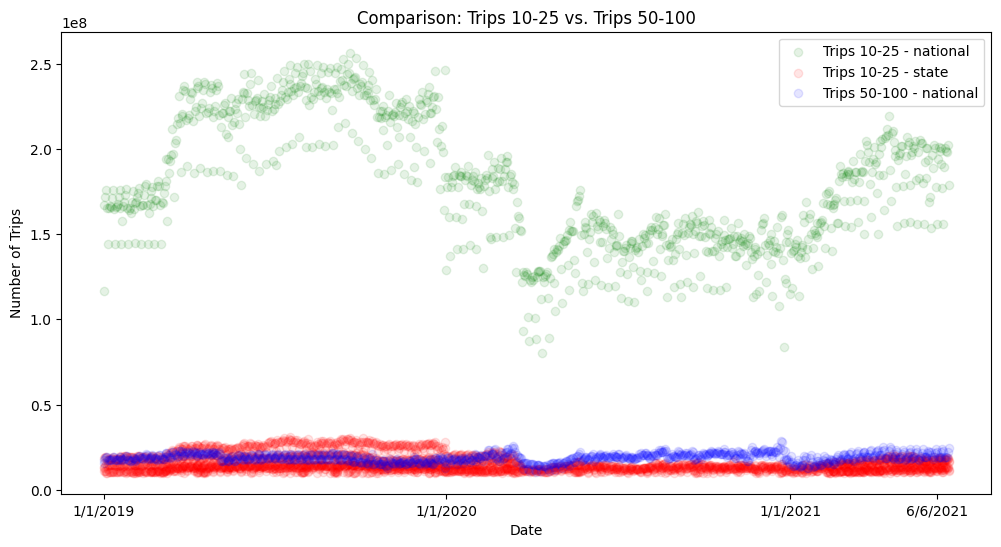

In [ ]:
#import libraries
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import time

#define datatypes for each column
dtype={'County Name': 'object',
       'Number of Trips': 'float64',
       'Number of Trips 1-3': 'float64',
       'Number of Trips 10-25': 'float64',
       'Number of Trips 100-250': 'float64',
       'Number of Trips 25-50': 'float64',
       'Number of Trips 250-500': 'float64',
       'Number of Trips 3-5': 'float64',
       'Number of Trips 5-10': 'float64',
       'Number of Trips 50-100': 'float64',
       'Number of Trips <1': 'float64',
       'Number of Trips >=500': 'float64',
       'Population Not Staying at Home': 'float64',
       'Population Staying at Home': 'float64',
       'State Postal Code': 'object'}

#start the timer
start = time.time()

#read the dataset
df = dd.read_csv("/content/Trips_by_Distance (1).csv", dtype=dtype)

#filter the dataset for 'Number of Trips 10-25' > 10,000,000
df_10_to_25 = df[df['Number of Trips 10-25'] > 10_000_000].compute()

#filter the dataset for 'Number of Trips 50-100' > 10,000,000
df_50_to_100 = df[df['Number of Trips 50-100'] > 10_000_000].compute()

#filter columns in 'Numer of Trips 10-25' if it is in the 'National' level
df_national_10_25 = df_10_to_25[df_10_to_25['Level'] == 'National']

#filter columns in 'Numer of Trips 10-25' if it is in the 'State' level
df_state_10_25 = df_10_to_25[df_10_to_25['Level'] == 'State']

print(df_state_10_25)
print(df_national_10_25)
print(df_50_to_100)

#stop the timer
dask_time = time.time() - start
print("time:", dask_time, " seconds")

#plot scatter graph
plt.figure(figsize=(12, 6))
plt.scatter(df_national_10_25['Date'], df_national_10_25['Number of Trips 10-25'],
            color='green', alpha=0.1, label='Trips 10-25 - national')
plt.scatter(df_state_10_25['Date'], df_state_10_25['Number of Trips 10-25'],
            color='red', alpha=0.1, label='Trips 10-25 - state')
plt.scatter(df_50_to_100['Date'], df_50_to_100['Number of Trips 50-100'],
            color='blue', alpha=0.1, label='Trips 50-100 - national')
plt.xticks([0, 365, 731, 887])
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Comparison: Trips 10-25 vs. Trips 50-100')
plt.legend()
plt.show()
